# Where Should Chipotle Build Their Next Restaurant?

## Load Libraries

In [1]:
import pandas as pd 
import folium 
from folium import plugins
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from fuzzywuzzy import fuzz

from sklearn.linear_model import LinearRegression

## Load the Datasets

In [2]:
#Chipotle's Stores Data:
chipotle_df = pd.read_csv(r'...')

#Maryland Population Data:
md_data_df = pd.read_csv(r'...')

## Data Cleaning
1. Get data just from MD
2. Turn cities into counties
3. Merge both dataframes

#### 1. Get data just from MD:

In [3]:
#I just want the data from the Chipotle's located in Maryland:
md_chipotle_df = chipotle_df.loc[(chipotle_df.state == 'Maryland')]
md_chipotle_df.head()

,state,location,address,latitude,longitude
1141,Maryland,Annapolis,"2002 Annapolis Mall Spc 185 Annapolis, MD 2140...",38.987534,-76.547039
1142,Maryland,Annapolis,"36 Market Space Annapolis, MD 21401 US",38.977791,-76.487811
1143,Maryland,Aspen Hill,"13501 Connecticut Ave Aspen Hill, MD 20906 US",39.076739,-77.080039
1144,Maryland,Baltimore,"1040 W 41st St Baltimore, MD 21211 US",39.337918,-76.635498
1145,Maryland,Baltimore,"1209 N Charles St Ste B Baltimore, MD 21201 US",39.304273,-76.615942


In [4]:
#Making sure only Chipotle stores from Maryland were included:
md_chipotle_df.state.unique()

array(['Maryland'], dtype=object)

#### 2. Turn cities into counties:

In [5]:
pd.options.mode.chained_assignment = None  # default='warn'

In [6]:
#Checking all the different cities included in the df:
md_chipotle_df.location.unique()

array(['Annapolis', 'Aspen Hill', 'Baltimore', 'Bel Air', 'Bethesda',
       'Bowie', 'Brandywine', 'Camp Springs', 'Capitol Heights',
       'Chevy Chase', 'Clinton', 'College Park', 'Columbia', 'Damascus',
       'Dunkirk', 'Easton', 'Edgewater', 'Ellicott City', 'Forest Hill',
       'Forestville', 'Frederick', 'Fulton', 'Gaithersburg', 'Gambrills',
       'Germantown', 'Glen Burnie', 'Greenbelt', 'Hagerstown', 'Hanover',
       'Hunt Valley', 'Hyattsville', 'Kensington', 'La Plata', 'Lanham',
       'Laurel', 'Lexington Park', 'Linthicum Heights',
       'Lutherville Timonium', 'Mount Airy', 'New Carrollton',
       'Ocean City', 'Olney', 'Owings Mills', 'Oxon Hill', 'Parkville',
       'Pikesville', 'Potomac', 'Prince Frederick', 'Rockville',
       'Rosedale', 'Salisbury', 'Severna Park', 'Silver Spring',
       'Sykesville', 'Towson', 'Upper Marlboro', 'Waldorf', 'Westminster',
       'Wheaton', 'Windsor Mill'], dtype=object)

In [7]:
#Create a new 'county' column:
md_chipotle_df['county'] = md_chipotle_df['location']

In [8]:
#Replace the city's name with their county's name:
#County: Baltimore
md_chipotle_df['county'].replace(['Windsor Mill', 'Hunt Valley', 
                                  'Lutherville Timonium', 'Owings Mills', 
                                  'Pikesville', 'Parkville', 
                                  'Rosedale', 'Towson'], 'Baltimore County', inplace = True)

In [9]:
#County: Baltimore City
md_chipotle_df['county'].replace(['Baltimore'], 'Baltimore City', inplace = True)

In [10]:
#County: Calvert
md_chipotle_df['county'].replace(['Prince Frederick', 'Dunkirk'], 'Calvert County', inplace = True)

In [11]:
#County: Charles
md_chipotle_df['county'].replace(['Waldorf', 'La Plata'], 'Charles County', inplace = True)

In [12]:
#County: Anne Arundel
md_chipotle_df['county'].replace(['Severna Park', 'Linthicum Heights', 
                                  'Hanover', 'Glen Burnie', 
                                  'Gambrills', 'Edgewater', 
                                  'Annapolis'], 'Anne Arundel County', inplace = True)

In [13]:
#County: Carroll
md_chipotle_df['county'].replace(['Westminster', 'Sykesville'], 'Carroll County', inplace = True)

In [14]:
#County: Montgomery
md_chipotle_df['county'].replace(['Wheaton', 'Silver Spring', 
                                  'Rockville', 'Potomac', 
                                  'Olney', 'Kensington', 
                                  'Germantown', 'Gaithersburg', 
                                  'Damascus', 'Chevy Chase', 
                                  'Bethesda',  'Aspen Hill'], 'Montgomery County', inplace = True)

In [15]:
#County: Prince George's  
md_chipotle_df['county'].replace(['Upper Marlboro', 'Oxon Hill', 
                                  'New Carrollton', 'Lanham', 
                                  'Laurel', 'Hyattsville', 
                                  'Greenbelt', 'Forestville', 
                                  'Clinton', 'College Park', 
                                  'Bowie',  'Brandywine', 
                                  'Camp Springs',  'Capitol Heights'], "Prince George's County" , inplace = True)

In [16]:
#County: Worcester
md_chipotle_df['county'].replace(['Ocean City'], 'Worcester County', inplace = True)

In [17]:
#County: ST. MARY
md_chipotle_df['county'].replace(['Lexington Park'], "St. Mary's County", inplace = True)

In [18]:
#County: Washington
md_chipotle_df['county'].replace(['Hagerstown'], "Washington County", inplace = True)

In [19]:
#County: Howard
md_chipotle_df['county'].replace(['Columbia', 'Fulton', 'Ellicott City'], 'Howard County', inplace = True)

In [20]:
#County: 'Frederick'
md_chipotle_df['county'].replace(['Frederick', 'Mount Airy'], "Frederick County", inplace = True)

In [21]:
#County: Harford
md_chipotle_df['county'].replace(['Forest Hill', 'Bel Air'], 'Harford County', inplace = True)

In [22]:
#County: 'Talbot'
md_chipotle_df['county'].replace(['Easton'], "Talbot County", inplace = True)

In [23]:
#County: Wicomico
md_chipotle_df['county'].replace(['Salisbury'], "Wicomico County", inplace = True)

In [24]:
#Check the new updated 'county' column:
md_chipotle_df.head()

,state,location,address,latitude,longitude,county
1141,Maryland,Annapolis,"2002 Annapolis Mall Spc 185 Annapolis, MD 2140...",38.987534,-76.547039,Anne Arundel County
1142,Maryland,Annapolis,"36 Market Space Annapolis, MD 21401 US",38.977791,-76.487811,Anne Arundel County
1143,Maryland,Aspen Hill,"13501 Connecticut Ave Aspen Hill, MD 20906 US",39.076739,-77.080039,Montgomery County
1144,Maryland,Baltimore,"1040 W 41st St Baltimore, MD 21211 US",39.337918,-76.635498,Baltimore City
1145,Maryland,Baltimore,"1209 N Charles St Ste B Baltimore, MD 21201 US",39.304273,-76.615942,Baltimore City


In [25]:
#Making sure there arent any null values:
md_chipotle_df.isnull().sum()

state        0
location     0
address      0
latitude     0
longitude    0
county       0
dtype: int64

In [26]:
#Checking all the different counties included in the df:
md_chipotle_df.county.unique()

array(['Anne Arundel County', 'Montgomery County', 'Baltimore City',
       'Harford County', "Prince George's County", 'Howard County',
       'Calvert County', 'Talbot County', 'Frederick County',
       'Washington County', 'Baltimore County', 'Charles County',
       "St. Mary's County", 'Worcester County', 'Wicomico County',
       'Carroll County'], dtype=object)

#### 3. Merge both dataframes:

In [27]:
#Maryland economic data:
md_data_df.head()

,geo,"Total Population, 2018",Labor Force,Unemployment,Median Household Income ($ Dollars),Median Sale Price of a Home ($ Dollars),Local Personal Income Tax Rate (%),Bachelor's Degree Attainment (%),Average Travel Time to Work (Minutes)
0,Allegany County,70975,31984,1764,43535,90829,3.05%,18.3,21.3
1,Anne Arundel County,576031,309603,10343,97051,338287,2.81,40.9,30.7
2,Baltimore City,602495,289758,16454,50501,139723,3.2,31.2,31.0
3,Baltimore County,828431,450366,18202,75836,238426,3.2,38.6,29.6
4,Calvert County,92003,49121,1739,106270,318471,3,31.1,41.7


In [28]:
#Making sure there arent any null values:
md_data_df.isnull().sum()

geo                                        0
Total Population, 2018                     0
Labor Force                                0
Unemployment                               0
Median Household Income ($ Dollars)        0
Median Sale Price of a Home ($ Dollars)    0
Local Personal Income Tax Rate (%)         0
Bachelor's Degree Attainment (%)           0
Average Travel Time to Work (Minutes)      0
dtype: int64

In [29]:
#Checking all the different counties included in the df:
md_data_df.geo.unique()

array(['Allegany County', 'Anne Arundel County', 'Baltimore City',
       'Baltimore County', 'Calvert County', 'Caroline County',
       'Carroll County', 'Cecil County', 'Charles County',
       'Dorchester County', 'Frederick County', 'Garrett County',
       'Harford County', 'Howard County', 'Kent County',
       'Montgomery County', "Prince George's County",
       "Queen Anne's County", "St. Mary's County", 'Somerset County',
       'Talbot County', 'Washington County', 'Wicomico County',
       'Worcester County'], dtype=object)

In [30]:
#Create a list of all the unique counties in the economic df:
counties_from_md_data = md_data_df.geo.unique()
counties_from_md_data.sort()
#counties_from_md_data

In [31]:
#Number of unique values in the economic dataframe:
len(counties_from_md_data)

24

In [32]:
#Create a list of all the unique counties in the chipotle df:
counties_from_md_chipotle = md_chipotle_df.county.unique()
counties_from_md_chipotle.sort()
#counties_from_md_chipotle

In [33]:
#Number of unique values in the chipotle dataframe:
len(counties_from_md_chipotle)

16

In [34]:
#Crete a function that takes in the name of a team, a team list, and a fuzzywuzzy score. 
def match_names(name, list_names, min_score=0):
    max_score = -1
    max_name = ''
    for x in list_names:
        score = fuzz.ratio(name, x)
        if (score > min_score) & (score > max_score):
            max_name = x
            max_score = score
    return (max_name, max_score)

In [35]:
#Run a for loop to use the function for all team names in "economy_names" and compare it witht the "table_names" list and use a score of 55. 
names = []
for x in counties_from_md_chipotle:
    match = match_names(x, counties_from_md_data, 99)
    if match[1] >= 50:
        name = (str(x), str(match[0]))
        names.append(name)
name_dict = dict(names)
name_dict

{'Anne Arundel County': 'Anne Arundel County',
 'Baltimore City': 'Baltimore City',
 'Baltimore County': 'Baltimore County',
 'Calvert County': 'Calvert County',
 'Carroll County': 'Carroll County',
 'Charles County': 'Charles County',
 'Frederick County': 'Frederick County',
 'Harford County': 'Harford County',
 'Howard County': 'Howard County',
 'Montgomery County': 'Montgomery County',
 "Prince George's County": "Prince George's County",
 "St. Mary's County": "St. Mary's County",
 'Talbot County': 'Talbot County',
 'Washington County': 'Washington County',
 'Wicomico County': 'Wicomico County',
 'Worcester County': 'Worcester County'}

In [36]:
#Number of all matching values (from both dataframes)
len(name_dict)

16

In [37]:
#Which counties did not find a match:
for counties in counties_from_md_data:
    if not counties in name_dict:
        print(counties)

Allegany County
Caroline County
Cecil County
Dorchester County
Garrett County
Kent County
Queen Anne's County
Somerset County


There are 8 counties in the economy dataframe that do not appear in the chipotle dataframe. I will drop these values. 

In [38]:
#Drop the 8 missing counties:
dropped_names = ['Allegany County', 'Caroline County', 'Cecil County', 'Dorchester County', 'Garrett County', 'Kent County', "Queen Anne's County", 'Somerset County']

In [39]:
#Drop the 8 counties that are not in the chipotle df:
md_data_df2 = md_data_df[~md_data_df['geo'].isin(dropped_names)]
#md_data_df2.head()

In [40]:
#Drop columns that will not be used:
md_data_df2 = md_data_df.drop(['Median Sale Price of a Home ($ Dollars)', 'Local Personal Income Tax Rate (%)', "Bachelor's Degree Attainment (%)"], 1)
#md_data_df2.head()

In [41]:
#Rename the 'geo' column:
md_data_df2 = md_data_df2.rename({'geo': 'County'}, axis=1)
md_data_df2.head()

,County,"Total Population, 2018",Labor Force,Unemployment,Median Household Income ($ Dollars),Average Travel Time to Work (Minutes)
0,Allegany County,70975,31984,1764,43535,21.3
1,Anne Arundel County,576031,309603,10343,97051,30.7
2,Baltimore City,602495,289758,16454,50501,31.0
3,Baltimore County,828431,450366,18202,75836,29.6
4,Calvert County,92003,49121,1739,106270,41.7


In [42]:
#Count the total chipotle restaurants by county:
chipotle_count_df = md_chipotle_df.county.value_counts()
total_chipotle_df = pd.DataFrame({'County':chipotle_count_df.index,
                                  'Total Restaurants':chipotle_count_df.values})
total_chipotle_df.head()

,County,Total Restaurants
0,Montgomery County,22
1,Prince George's County,20
2,Baltimore City,12
3,Anne Arundel County,9
4,Baltimore County,9


In [43]:
#Ready to merge:
merged_df = pd.merge(total_chipotle_df,md_data_df2, on='County')
merged_df.head()

,County,Total Restaurants,"Total Population, 2018",Labor Force,Unemployment,Median Household Income ($ Dollars),Average Travel Time to Work (Minutes)
0,Montgomery County,22,1052567,554989,17560,107758,34.6
1,Prince George's County,20,909308,504423,20573,82445,37.0
2,Baltimore City,12,602495,289758,16454,50501,31.0
3,Anne Arundel County,9,576031,309603,10343,97051,30.7
4,Baltimore County,9,828431,450366,18202,75836,29.6


## Exploratory Data Analysis

In [44]:
#individual restaurants locations map:
md_map = folium.Map([38.9, -76.9], zoom_start=8.2, tiles="cartodbpositron")
for lat, lon,loc in zip(md_chipotle_df.latitude, md_chipotle_df.longitude,md_chipotle_df.location):
    folium.CircleMarker([lat, lon],radius=7.5, color=None,
                        fill_color='red',fill_opacity=0.3,
                        tooltip="Location : "+str(loc)).add_to(md_map)
    
md_map

In [45]:
#Chipotle's heat map location:
md_map2 = folium.Map([38.9, -76.9], zoom_start=8.2, tiles="cartodbpositron")
map_title = 'Chipotle Locations Heatmap'
#md_map2.get_root().html.add_child(folium.Element(title_html))
md_map2.add_child(plugins.HeatMap(md_chipotle_df[['latitude', 'longitude']]))
md_map2

In [46]:
#Chart Style:
#plt.style.use('fivethirtyeight')
#tnrfont = {'fontname':'Times New Roman'}
#hfont = {'fontname':'Helvetica'}

<ipython-input-47-00954feac593>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(merged_df["County"], rotation=90, label='Year')


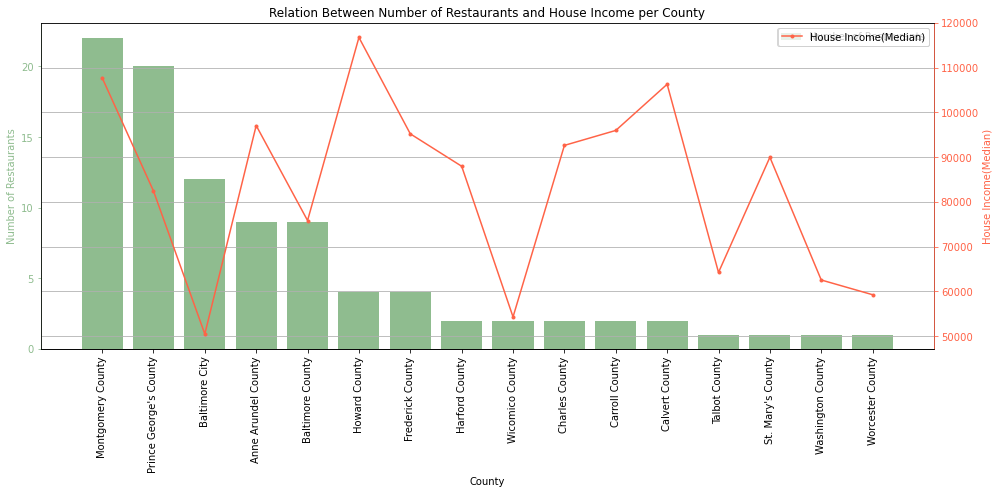

In [47]:
#Relation Between Number of Restaurants and House Income per County:
fig, ax = plt.subplots(figsize=(16, 6))

#Bar Chart (Money Spent)
ax.bar(merged_df["County"], merged_df["Total Restaurants"], color=('darkseagreen'), label='Number of Restaurants')
ax.spines['left'].set_color('darkseagreen')
ax.tick_params(axis='y', colors='darkseagreen')
ax.set_xlabel("County")
ax.set_xticklabels(merged_df["County"], rotation=90, label='Year')
ax.set_ylabel(r"Number of Restaurants", color=('darkseagreen'))
ax.legend(loc='best')
#ax.set_yticklabels("", color=('darkseagreen'))
#ax.legend(loc='best')


#Line Chart (Position)
ax2 = ax.twinx()
ax2.plot(merged_df["County"], merged_df["Median Household Income ($ Dollars)"], '.-', color='tomato', label='House Income(Median)')
ax2.set_ylabel(r"House Income(Median)", color='tomato')
ax2.spines['right'].set_color('tomato')
ax2.tick_params(axis='y', colors='tomato')
ax2.grid()
ax2.legend(loc='best')

plt.title("Relation Between Number of Restaurants and House Income per County")
plt.show()

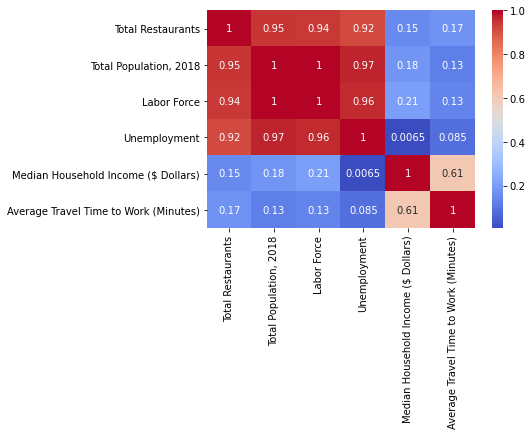

In [48]:
#Correlation heatmap:
sns.heatmap(merged_df.corr(), annot=True, cmap='coolwarm')
plt.show()

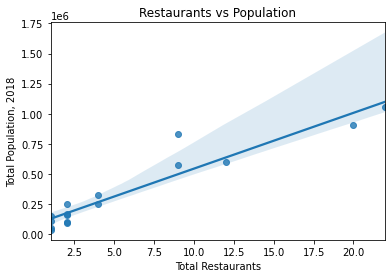

In [49]:
#Restaurants vs Population relation:
plt.title("Restaurants vs Population")
sns.regplot(x = 'Total Restaurants', y = 'Total Population, 2018', data=merged_df)
plt.show()

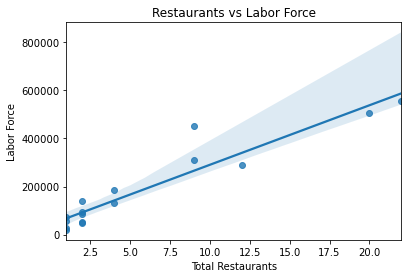

In [50]:
#Restaurants vs Labor Force relation:
plt.title("Restaurants vs Labor Force")
sns.regplot(x = 'Total Restaurants', y = 'Labor Force', data=merged_df)
plt.show()

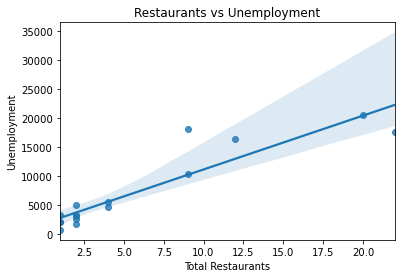

In [51]:
#Restaurants vs Unemployment relation:
plt.title("Restaurants vs Unemployment")
sns.regplot(x = 'Total Restaurants', y = 'Unemployment', data=merged_df)
plt.show()

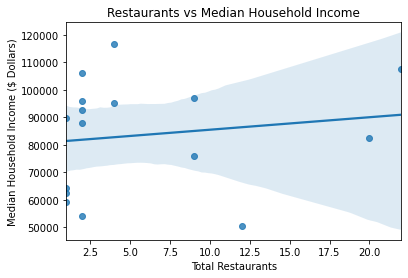

In [52]:
#Restaurants vs Median Household Income relation:
plt.title("Restaurants vs Median Household Income")
sns.regplot(x = 'Total Restaurants', y = 'Median Household Income ($ Dollars)', data=merged_df)
plt.show()

Based on the correlation heatmap, the columns that correlate the most with the number of restaurants are: "Total Population, 2018", "Labor Force" and "Unemployment". Surprisingly, "Median Household Income ($ Dollars)" is not a great indicator. I will be using: "Total Population 2018" and "Labor Force" to fit my model.

## Prediction Time

In [53]:
#Select the target:
y = merged_df['Total Restaurants']

In [54]:
#Select the features:
X = merged_df[['Total Population, 2018', 'Labor Force']]

In [55]:
#Fitting Linear Regression
model=LinearRegression()
model.fit(X,y)
print(f"R2 score : {round(model.score(X,y)*100,2)}%")

R2 score : 90.4%


In [56]:
#Predicting the number of restaurants
restaurant_prediction = model.predict(X)
restaurant_prediction = np.round(restaurant_prediction,0)
restaurant_prediction

array([20., 16., 12., 10., 15.,  5.,  4.,  4.,  1.,  2.,  2.,  1., -0.,
        1.,  2., -0.])

In [57]:
merged_df['Predicted Restaurants'] = restaurant_prediction
merged_df['Predicted Restaurants'] = merged_df['Predicted Restaurants'].astype('int')
merged_df.head()

,County,Total Restaurants,"Total Population, 2018",Labor Force,Unemployment,Median Household Income ($ Dollars),Average Travel Time to Work (Minutes),Predicted Restaurants
0,Montgomery County,22,1052567,554989,17560,107758,34.6,20
1,Prince George's County,20,909308,504423,20573,82445,37.0,16
2,Baltimore City,12,602495,289758,16454,50501,31.0,12
3,Anne Arundel County,9,576031,309603,10343,97051,30.7,10
4,Baltimore County,9,828431,450366,18202,75836,29.6,15


C:\Users\steve\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


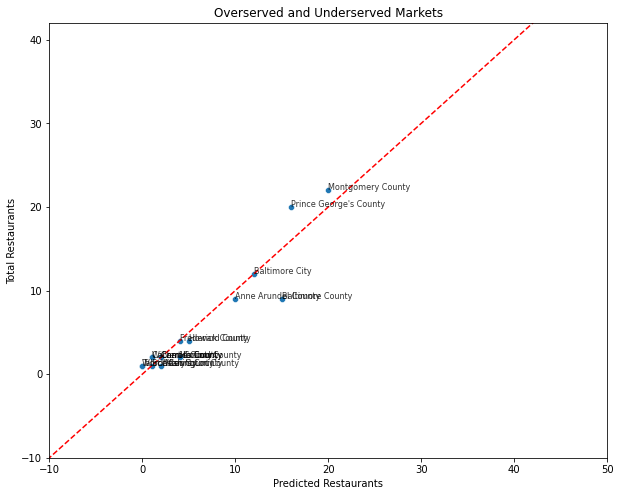

In [58]:
plt.figure(figsize=(10,8))
plt.title("Overserved and Underserved Markets")
plot=sns.scatterplot('Predicted Restaurants','Total Restaurants',data=merged_df)
for i in range(0, merged_df.shape[0]):
    plot.text(merged_df['Predicted Restaurants'][i], merged_df['Total Restaurants'][i], merged_df.County[i], alpha=0.8, fontsize=8 )
plt.plot([-50,500],[-50,500],'r--')
plt.xlim(-10, 50, 5)
#plt.xlim(-10,max(merged_df['Predicted Restaurants'])+20)
plt.ylim(-10,max(merged_df['Total Restaurants'])+20)
plt.show()

In [59]:
merged_df['Difference'] = merged_df['Predicted Restaurants'] - merged_df['Total Restaurants']
merged_df.head(16)

,County,Total Restaurants,"Total Population, 2018",Labor Force,Unemployment,Median Household Income ($ Dollars),Average Travel Time to Work (Minutes),Predicted Restaurants,Difference
0,Montgomery County,22,1052567,554989,17560,107758,34.6,20,-2
1,Prince George's County,20,909308,504423,20573,82445,37.0,16,-4
2,Baltimore City,12,602495,289758,16454,50501,31.0,12,0
3,Anne Arundel County,9,576031,309603,10343,97051,30.7,10,1
4,Baltimore County,9,828431,450366,18202,75836,29.6,15,6
5,Howard County,4,323196,183889,5529,116719,31.3,5,1
6,Frederick County,4,255648,130831,4598,95196,35.2,4,0
7,Harford County,2,253956,138162,5005,87959,31.8,4,2
8,Wicomico County,2,103195,51041,2676,54313,22.0,1,-1
9,Charles County,2,161503,85104,3299,92616,44.4,2,0


In [60]:
#Markets that are perfectly served based on the model:
perfect_df = merged_df.loc[(merged_df.Difference == 0)]
perfect_df = perfect_df[['County', 'Total Restaurants', 'Predicted Restaurants', 'Difference']]
perfect_df

,County,Total Restaurants,Predicted Restaurants,Difference
2,Baltimore City,12,12,0
6,Frederick County,4,4,0
9,Charles County,2,2,0
10,Carroll County,2,2,0
13,St. Mary's County,1,1,0


In [61]:
#Markets that are under served based on the model:
under_df = merged_df.loc[(merged_df.Difference > 0)]
under_df = under_df[['County', 'Total Restaurants', 'Predicted Restaurants', 'Difference']]
under_df

,County,Total Restaurants,Predicted Restaurants,Difference
3,Anne Arundel County,9,10,1
4,Baltimore County,9,15,6
5,Howard County,4,5,1
7,Harford County,2,4,2
14,Washington County,1,2,1


In [62]:
#Markets that are over served based on the model:
over_df = merged_df.loc[(merged_df.Difference < 0)]
over_df = over_df[['County', 'Total Restaurants', 'Predicted Restaurants', 'Difference']]
over_df

,County,Total Restaurants,Predicted Restaurants,Difference
0,Montgomery County,22,20,-2
1,Prince George's County,20,16,-4
8,Wicomico County,2,1,-1
11,Calvert County,2,1,-1
12,Talbot County,1,0,-1
15,Worcester County,1,0,-1


Based on the datasets used and the linear regression model, Chipotle should consider building their new restaurants at Baltimore County, Harford County, Anne Arundel County, Howard County or Washington County. 

Disclaimer: This project is in no way affiliated with Chipotle, this is just a personal project.